In [ ]:
from urllib.request import urlretrieve
import zipfile
import os
import shutil
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print(zip_ref.read('ml-100k/u.info'))

b'943 users\n1682 items\n100000 ratings\n'


In [ ]:
subprocess.call(['sh', 'ml-100k/mku.sh'])


0

In [ ]:
# Load each data set (users, movies, and ratings).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
    'ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Since the ids start at 1, we shift them to start at 0.
users["user_id"] = (users["user_id"] - 1).astype(str)
movies["movie_id"] = (movies["movie_id"] - 1).astype(str)
movies["year"] = movies["release_date"].str.split('-').str[-1]
ratings["movie_id"] = (ratings["movie_id"] - 1).astype(str)
ratings["user_id"] = (ratings["user_id"] - 1).astype(str)
ratings["rating"] = ratings["rating"].astype(float)

# Data exploration

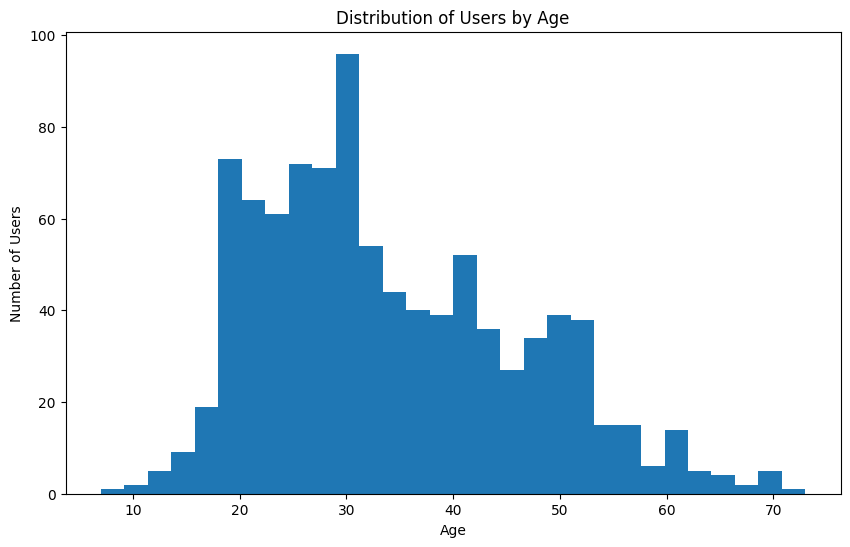

In [ ]:
# Analyzing the distribution of users by age
plt.figure(figsize=(10, 6))
users['age'].hist(bins=30)
plt.title('Distribution of Users by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

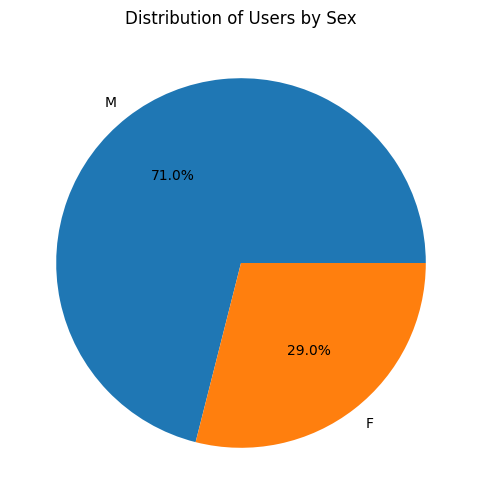

In [ ]:

# Analyzing the distribution of users by sex
plt.figure(figsize=(6, 6))
users['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Users by Sex')
plt.ylabel('')
plt.show()

In [ ]:
# Analyzing the distribution of users by occupation
plt.figure(figsize=(10, 6))
users['occupation'].value_counts().plot(kind='bar')
plt.title('Distribution of Users by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Analyzing the geographic distribution of users based on zip codes
# Note: This will be a basic analysis since zip codes are numerous and diverse
zip_code_counts = users['zip_code'].value_counts()
print("Top 10 Zip Codes with Most Users:")
print(zip_code_counts.head(10))



Top 10 Zip Codes with Most Users:
55414    9
55105    6
55337    5
10003    5
20009    5
27514    4
55454    4
55408    4
55113    3
02215    3
Name: zip_code, dtype: int64


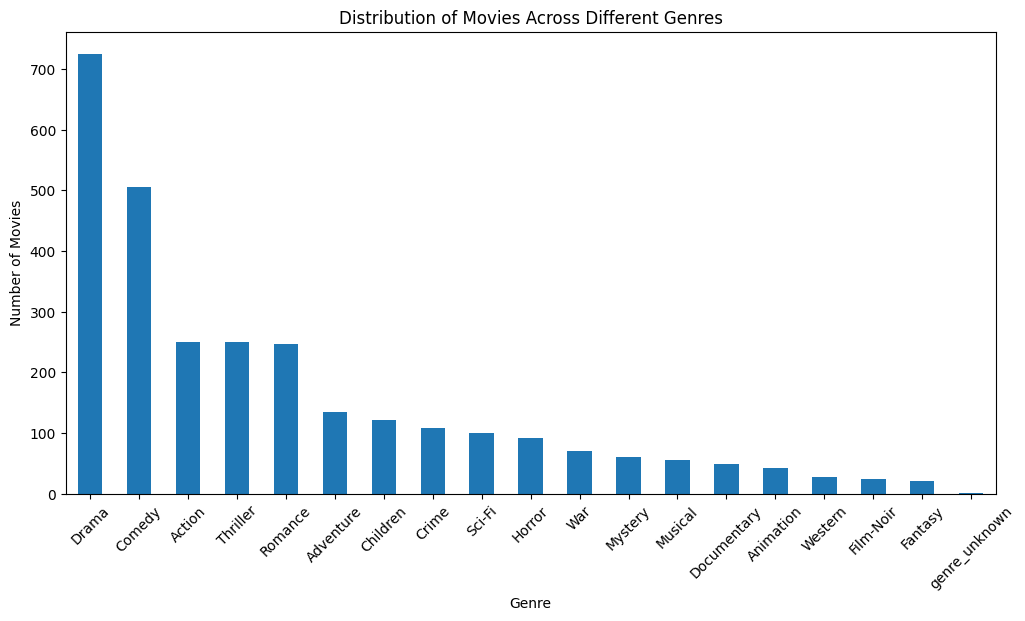

In [ ]:
# Analyzing the distribution of movies across different genres
genre_distribution = movies[genre_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar')
plt.title('Distribution of Movies Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

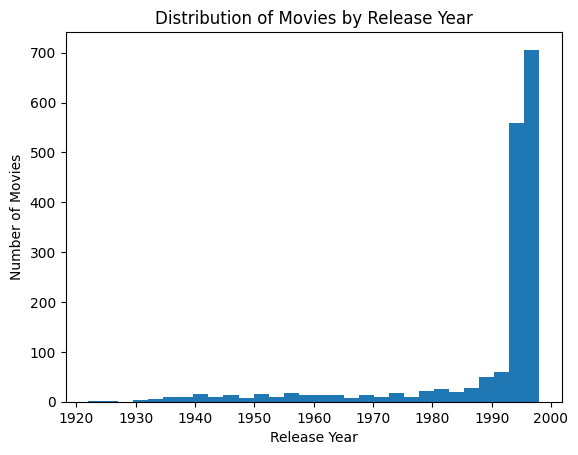

In [ ]:
# Analyzing the release year of the movies
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year  # Convert to datetime and extract year
movies['year'].dropna().astype(int).hist(bins=30)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(False)
plt.show()

In [ ]:
# Check for movies with the most and the least number of ratings
ratings_count = ratings['movie_id'].value_counts()
most_rated = ratings_count.idxmax()
least_rated = ratings_count.idxmin()

# Print movies with most and least ratings
print(f"Movie with the most ratings: {movies.loc[movies['movie_id'] == most_rated, 'title'].values[0]}")
print(f"Movie with the least ratings: {movies.loc[movies['movie_id'] == least_rated, 'title'].values[0]}")

Movie with the most ratings: Star Wars (1977)
Movie with the least ratings: Mirage (1995)


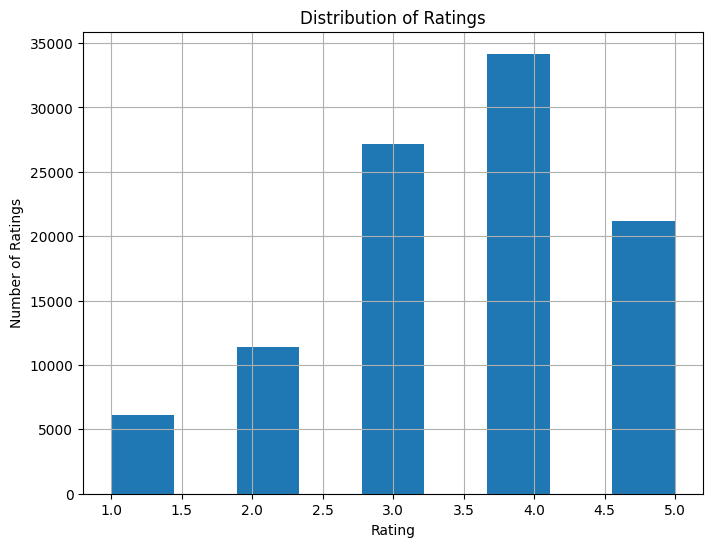

In [ ]:
# Look at the distribution of ratings
plt.figure(figsize=(8, 6))
ratings['rating'].hist(bins=9)  # Assuming ratings are on a 1-5 scale
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


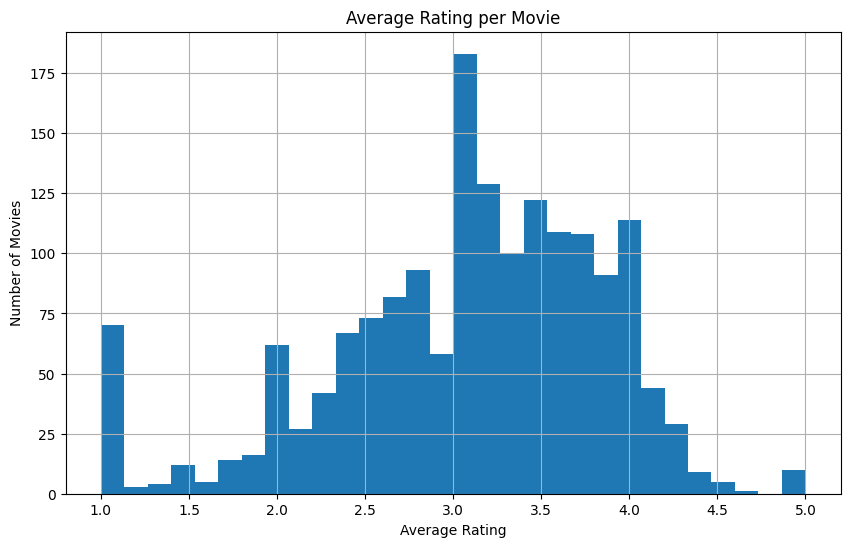

In [ ]:
# Analyze the average rating per movie
average_rating_per_movie = ratings.groupby('movie_id')['rating'].mean()
plt.figure(figsize=(10, 6))
average_rating_per_movie.hist(bins=30)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

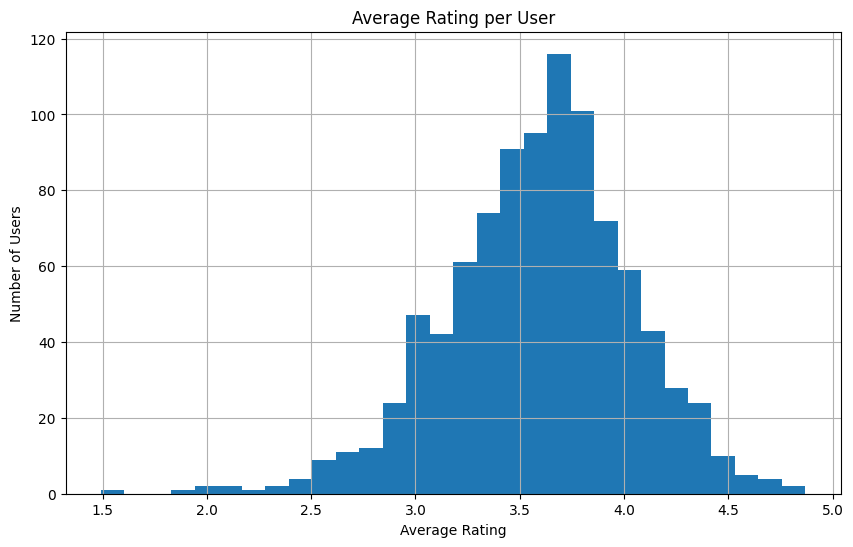

In [ ]:
# Analyze the average rating per user
average_rating_per_user = ratings.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
average_rating_per_user.hist(bins=30)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

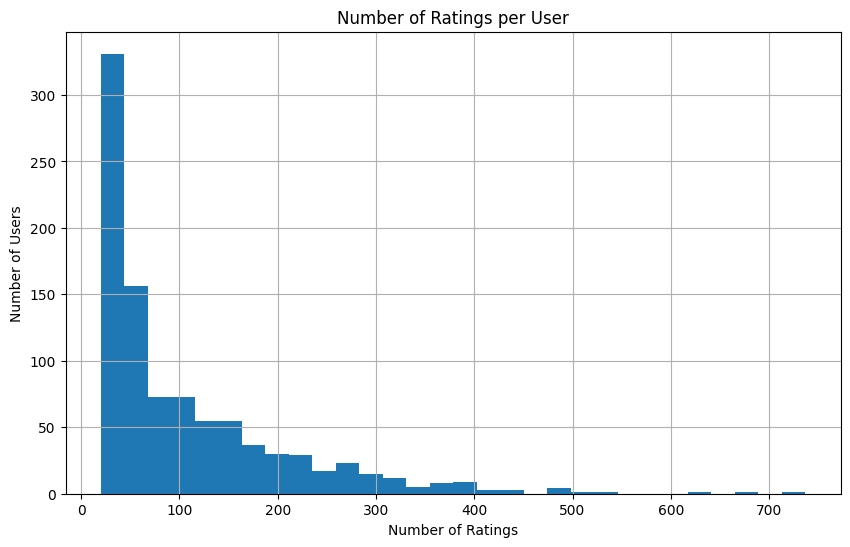

Summary Statistics for Number of Ratings per User:
count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64


In [ ]:
# Explore the number of ratings per user to understand user engagement
ratings_per_user = ratings.groupby('user_id')['rating'].count()
plt.figure(figsize=(10, 6))
ratings_per_user.hist(bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

# Additional summary statistics
print("Summary Statistics for Number of Ratings per User:")
print(ratings_per_user.describe())

In [ ]:
import pandas as pd

# Assuming you have already loaded the 'users', 'movies', and 'ratings' DataFrame as shown in your previous code

# Merge 'ratings' with 'users'
merged_df = pd.merge(ratings, users, on='user_id')

# Merge the resulting DataFrame with 'movies'
merged_df = pd.merge(merged_df, movies, on='movie_id')

# Now, 'merged_df' contains information about users, their ratings, and the movies

# Inspecting the first few rows of the merged DataFrame
merged_df.head()

,user_id,movie_id,rating,unix_timestamp,age,sex,occupation,zip_code,title,release_date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,195,241,3.0,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997.0
1,304,241,5.0,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997.0
2,5,241,4.0,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997.0
3,233,241,4.0,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997.0
4,62,241,3.0,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997.0


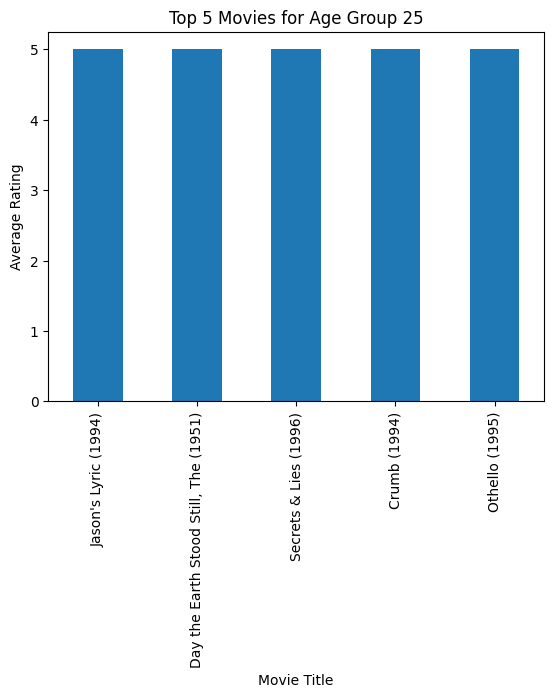

In [ ]:
# 1. Determining the Preferences of Specific User Demographics (e.g., by age)
age_group_ratings = merged_df.groupby(['age', 'title'])['rating'].mean().unstack()
# Example: Visualizing the top 5 movies for a specific age group (e.g., age 25)
age_group_ratings.loc[25].sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Movies for Age Group 25')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()

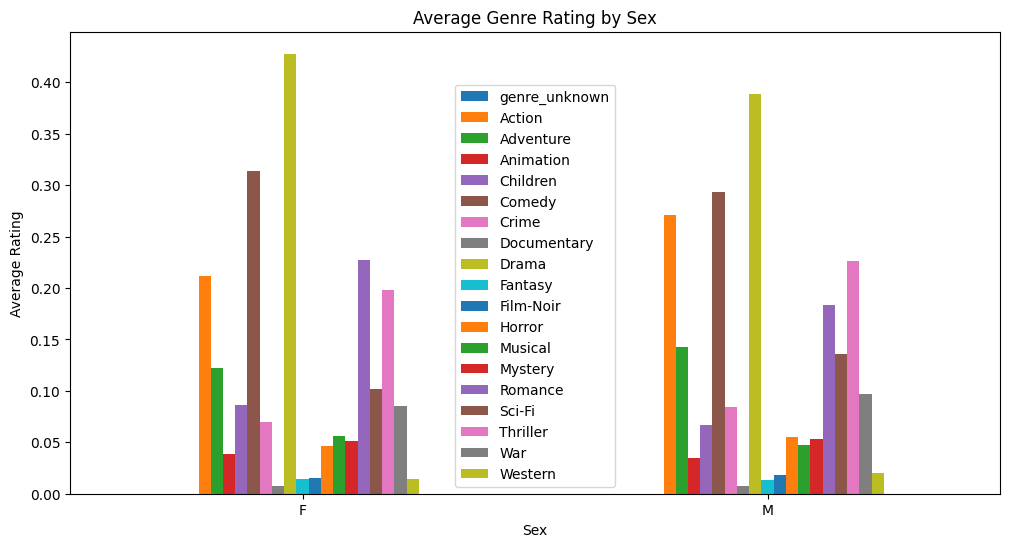

In [ ]:
# 2. Exploring the Popularity of Different Genres Among Different User Groups (e.g., by sex)
# Aggregate ratings for each genre by sex
genre_ratings_by_sex = merged_df.groupby('sex')[genre_cols].mean()
genre_ratings_by_sex.plot(kind='bar', figsize=(12, 6))
plt.title('Average Genre Rating by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

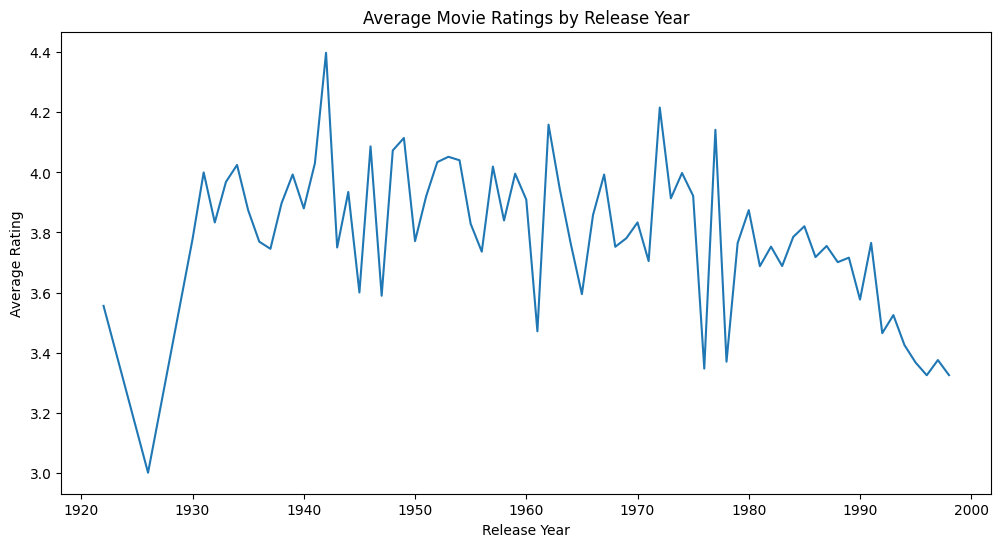

In [ ]:
# 3. Analyzing the Relationship Between Release Year and Ratings
# You might need to handle missing or incorrect years
merged_df['year'] = pd.to_datetime(merged_df['release_date'], errors='coerce').dt.year
yearly_ratings = merged_df.groupby('year')['rating'].mean()
yearly_ratings.plot(figsize=(12, 6))
plt.title('Average Movie Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()